# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-04-09


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
print("Counties with the most new cases:")
latest.sort_values('newcases', ascending=False)[:30]

Counties with the most new cases:


state         county  cases  deaths  newcases  newdeaths
1532       New York  New York City  87028    5150    5225.0      579.0
1531       New York         Nassau  20140     778    1592.0       77.0
1551       New York        Suffolk  17413     369    1569.0       41.0
1559       New York    Westchester  17004     389    1117.0       46.0
556        Illinois           Cook  11415     351     895.0       39.0
2171          Texas         Harris   3047      34     706.0        3.0
1907   Pennsylvania   Philadelphia   5029      86     573.0        0.0
1060  Massachusetts      Middlesex   4045      93     500.0       13.0
1469     New Jersey      Middlesex   4628     152     472.0       13.0
1464     New Jersey          Essex   6069     312     471.0       36.0
1459     New Jersey         Bergen   8343     345     469.0       31.0
1138       Michigan          Wayne  10093     504     467.0       58.0
271     Connecticut      Fairfield   4882     178     465.0       23.0
1466     New Jersey         Hudson   5879     132     442.0       10.0
1064  Massachusetts        Suffolk   4041      49     441.0        0.0
325         Florida     Miami-Dade   5897      66     437.0       16.0
178      California    Los Angeles   7955     223     425.0       25.0
973       Louisiana      Jefferson   4480     158     388.0        9.0
1477     New Jersey          Union   5203     145     372.0       20.0
1473     New Jersey        Passaic   4690      82     318.0       11.0
1543       New York       Rockland   6665     117     252.0       19.0
1119       Michigan        Oakland   4247     246     240.0       12.0
275     Connecticut      New Haven   2183      78     238.0        8.0
1472     New Jersey          Ocean   3093     119     237.0       18.0
1056  Massachusetts          Essex   2336      60     233.0        9.0
1062  Massachusetts        Norfolk   2007      50     229.0       10.0
1537       New York         Orange   4090      79     225.0       11.0
1470     New Jersey       Monmouth   3248      98     210.0       12.0
1862   Pennsylvania          Berks    616       8     200.0        1.0
2448     Washington           King   3888     260     198.0       14.0

In [7]:
print("Counties with the most new cases in California:")
latest[latest.state=="California"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in California:


state          county  cases  deaths  newcases  newdeaths
178  California     Los Angeles   7955     223     425.0       25.0
190  California       Riverside   1280      33     101.0        1.0
194  California       San Diego   1628      40      98.0        4.0
193  California  San Bernardino    729      24      88.0        4.0
187  California          Orange   1079      17      63.0        0.0
200  California     Santa Clara   1442      48      62.0        1.0
195  California   San Francisco    727      10      48.0        0.0
161  California         Alameda    734      17      39.0        1.0
191  California      Sacramento    612      22      33.0        0.0
167  California    Contra Costa    484       8      22.0        1.0

In [8]:
print("Counties with the most new cases in Colorado:")
latest[latest.state=="Colorado"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in Colorado:


state     county  cases  deaths  newcases  newdeaths
216  Colorado   Arapahoe    877      24     113.0        5.0
227  Colorado     Denver   1031      38     104.0        5.0
230  Colorado    El Paso    534      32      62.0        2.0
214  Colorado      Adams    475      16      58.0        2.0
239  Colorado  Jefferson    660      25      50.0        2.0
269  Colorado       Weld    614      36      41.0        6.0
228  Colorado    Douglas    270      10      26.0        2.0
252  Colorado     Morgan     44       0      21.0        0.0
229  Colorado      Eagle    394       5      20.0        0.0
219  Colorado    Boulder    217       7      10.0        4.0

In [9]:
print("Counties with the most new cases:")
latest.sort_values('newdeaths', ascending=False)[:30]

Counties with the most new cases:


state         county  cases  deaths  newcases  newdeaths
1532       New York  New York City  87028    5150    5225.0      579.0
1531       New York         Nassau  20140     778    1592.0       77.0
1138       Michigan          Wayne  10093     504     467.0       58.0
1559       New York    Westchester  17004     389    1117.0       46.0
1551       New York        Suffolk  17413     369    1569.0       41.0
556        Illinois           Cook  11415     351     895.0       39.0
1464     New Jersey          Essex   6069     312     471.0       36.0
1459     New Jersey         Bergen   8343     345     469.0       31.0
178      California    Los Angeles   7955     223     425.0       25.0
1108       Michigan         Macomb   2783     165     157.0       24.0
674         Indiana         Marion   2415      81     125.0       23.0
271     Connecticut      Fairfield   4882     178     465.0       23.0
1477     New Jersey          Union   5203     145     372.0       20.0
1543       New York       Rockland   6665     117     252.0       19.0
1472     New Jersey          Ocean   3093     119     237.0       18.0
1058  Massachusetts        Hampden   1276      82     195.0       17.0
983       Louisiana        Orleans   5242     224     172.0       16.0
325         Florida     Miami-Dade   5897      66     437.0       16.0
1471     New Jersey         Morris   2645     117     177.0       15.0
2448     Washington           King   3888     260     198.0       14.0
1060  Massachusetts      Middlesex   4045      93     500.0       13.0
1475     New Jersey       Somerset   1335      59     146.0       13.0
1469     New Jersey      Middlesex   4628     152     472.0       13.0
1470     New Jersey       Monmouth   3248      98     210.0       12.0
1063  Massachusetts       Plymouth   1507      45     180.0       12.0
1119       Michigan        Oakland   4247     246     240.0       12.0
1473     New Jersey        Passaic   4690      82     318.0       11.0
623        Illinois           Will   1012      46      98.0       11.0
1537       New York         Orange   4090      79     225.0       11.0
1466     New Jersey         Hudson   5879     132     442.0       10.0

In [10]:
print("Counties with the most new cases in California:")
latest[latest.state=="California"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new cases in California:


state          county  cases  deaths  newcases  newdeaths
178  California     Los Angeles   7955     223     425.0       25.0
194  California       San Diego   1628      40      98.0        4.0
193  California  San Bernardino    729      24      88.0        4.0
209  California          Tulare    187      10      19.0        3.0
161  California         Alameda    734      17      39.0        1.0
175  California            Kern    330       3      21.0        1.0
200  California     Santa Clara   1442      48      62.0        1.0
190  California       Riverside   1280      33     101.0        1.0
184  California        Monterey     71       3       2.0        1.0
213  California            Yuba     15       3       0.0        1.0

In [11]:
print("Counties with the most new cases in Colorado:")
latest[latest.state=="Colorado"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new cases in Colorado:


state     county  cases  deaths  newcases  newdeaths
269  Colorado       Weld    614      36      41.0        6.0
227  Colorado     Denver   1031      38     104.0        5.0
216  Colorado   Arapahoe    877      24     113.0        5.0
219  Colorado    Boulder    217       7      10.0        4.0
214  Colorado      Adams    475      16      58.0        2.0
215  Colorado    Alamosa      7       2       2.0        2.0
239  Colorado  Jefferson    660      25      50.0        2.0
228  Colorado    Douglas    270      10      26.0        2.0
230  Colorado    El Paso    534      32      62.0        2.0
236  Colorado   Gunnison     99       2       1.0        1.0

In [12]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [13]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

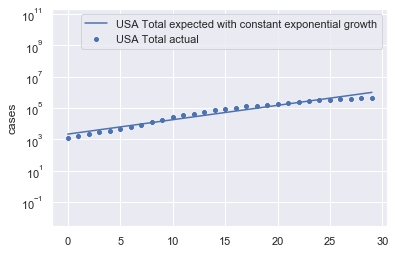

In [14]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [15]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 2128.3 * exp(0.2117 * day)
fitted daily growth rate: 23.57 %, fitted days to doubling: 3.27
actual daily growth rate: 7.69 %, actual days to doubling: 9.02


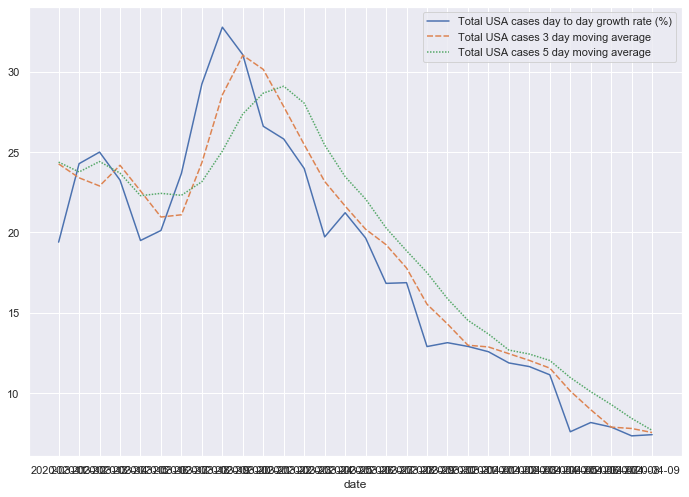

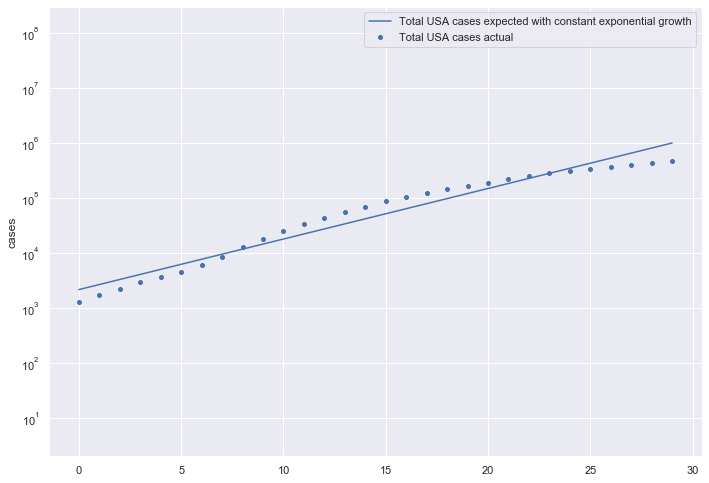

In [16]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

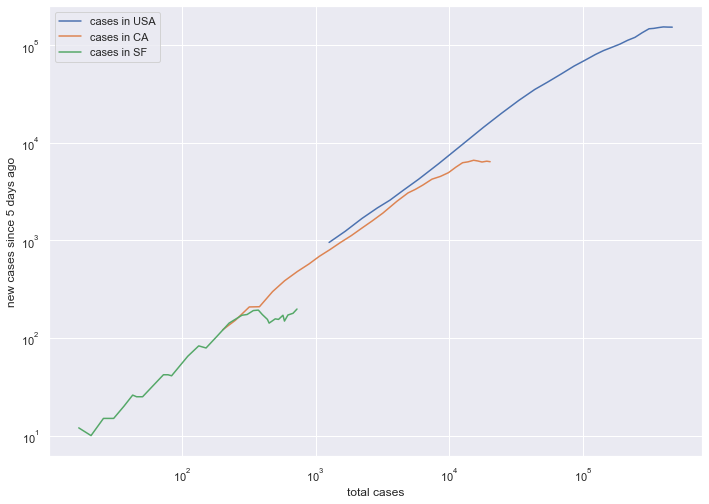

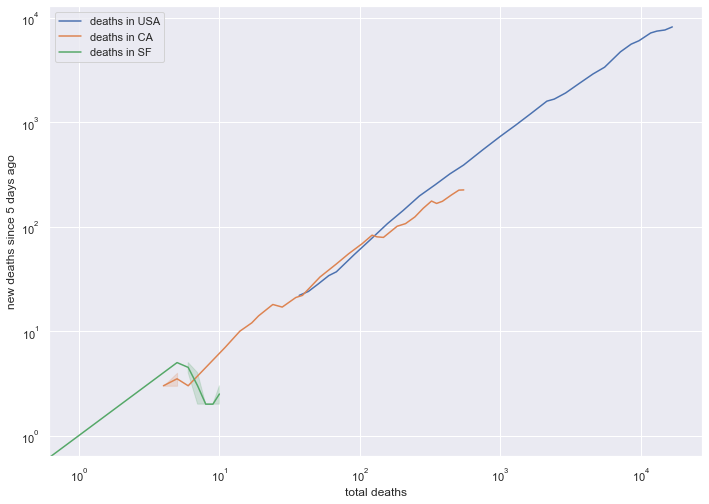

In [17]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [18]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [19]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [20]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
        laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


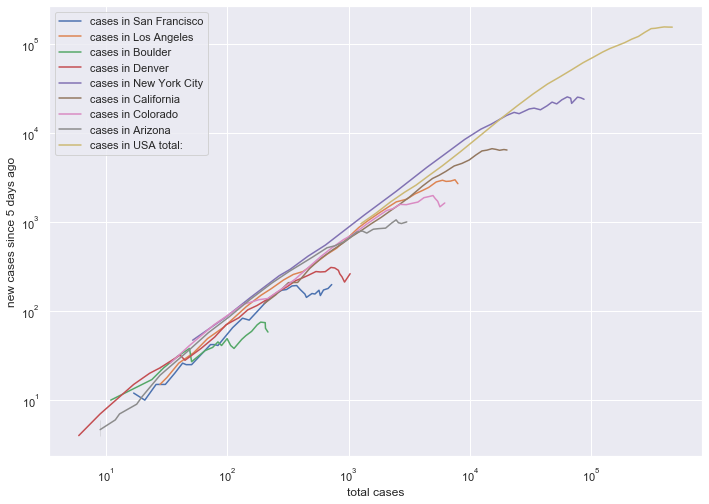

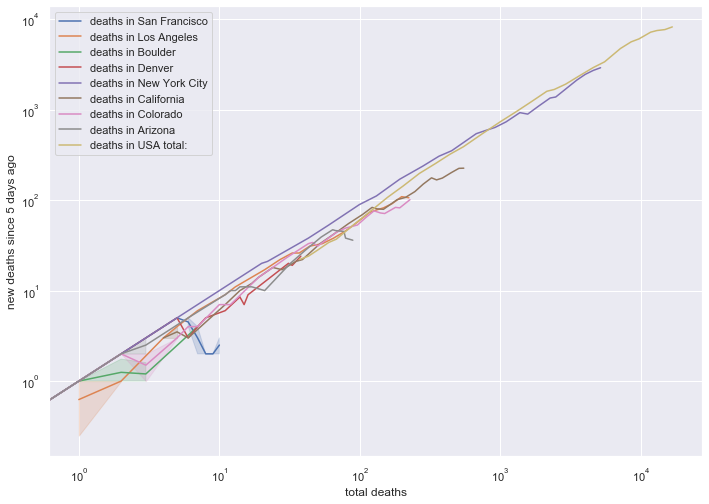


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 23.22 * exp(0.1328 * day)
fitted daily growth rate: 14.2 %, fitted days to doubling: 5.22
actual daily growth rate: 6.14 %, actual days to doubling: 11.29


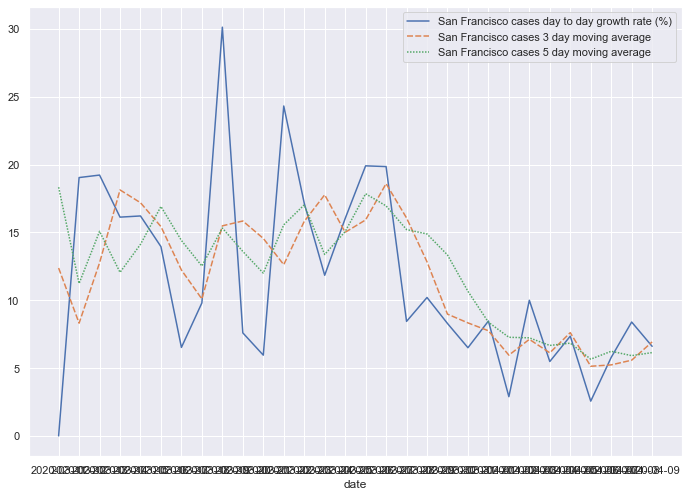

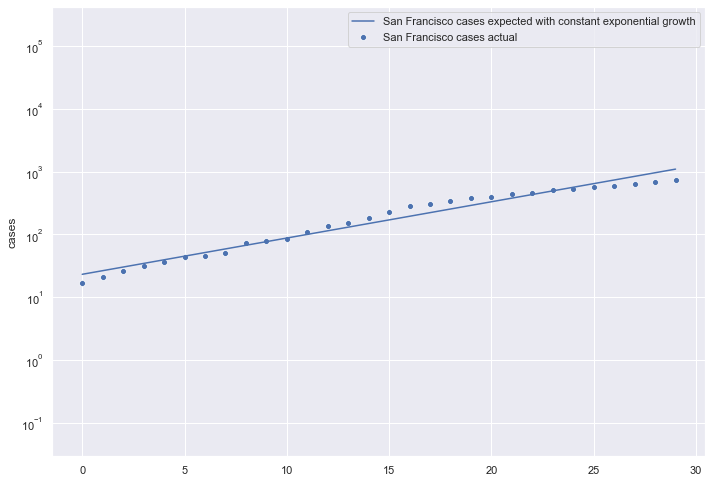

San Francisco deaths exponential formula fitted with 16 points:
deaths = 2.29 * exp(0.1177 * day)
fitted daily growth rate: 12.49 %, fitted days to doubling: 5.89
actual daily growth rate: 4.22 %, actual days to doubling: 16.42


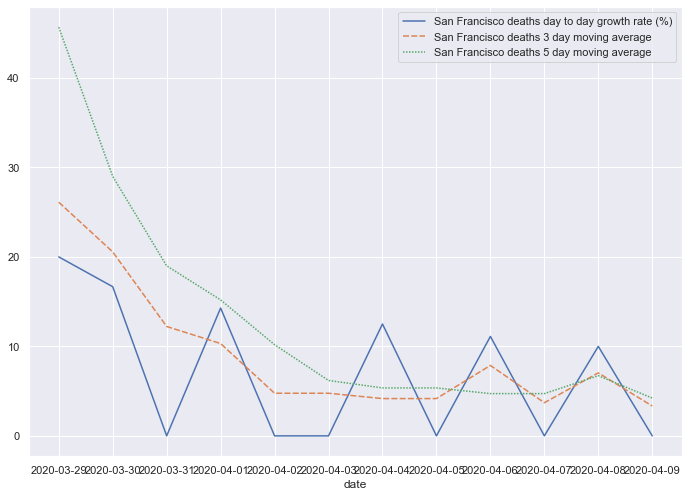

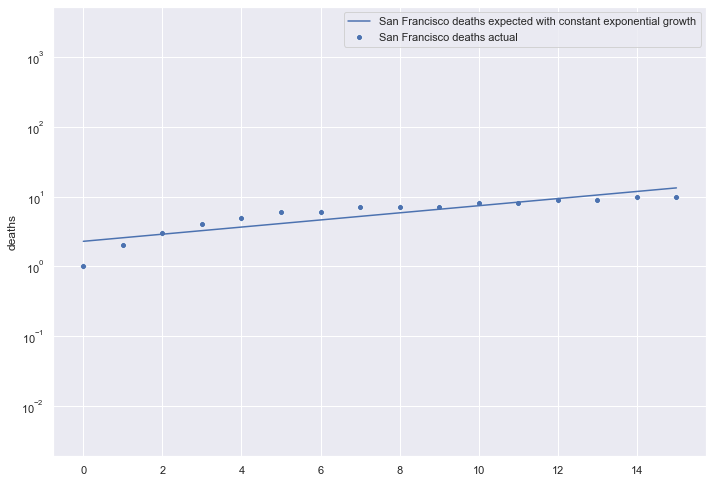

Trajectory plots for San Francisco, to see when the curve starts flattening


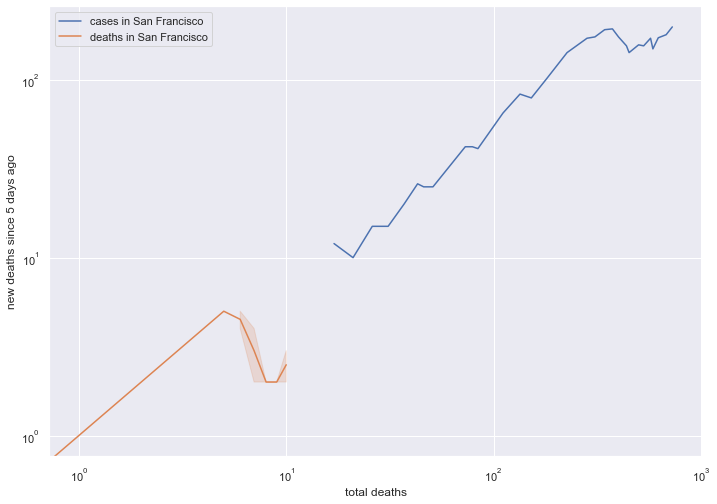

Correlations for San Francisco:


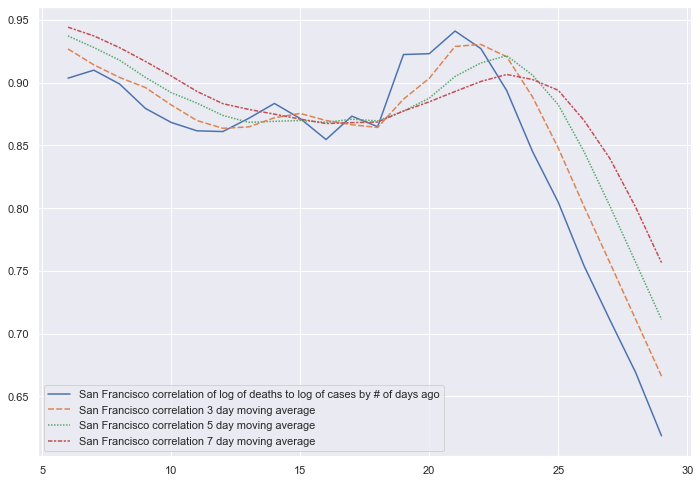

Deaths vs Lagged Values For San Francisco:


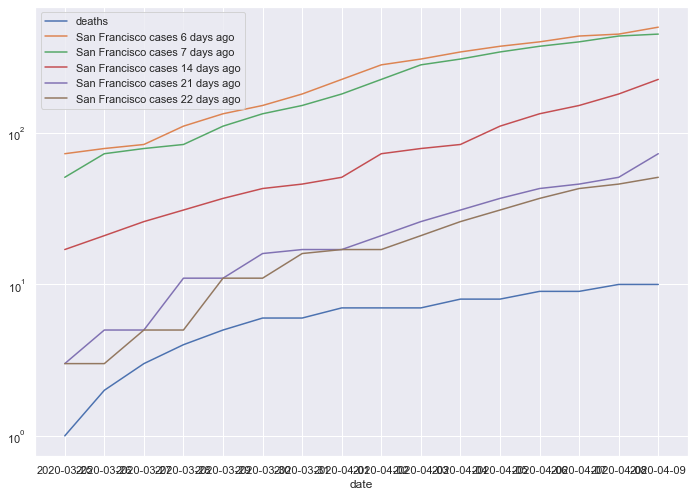

Deaths / Lagged Values For San Francisco:


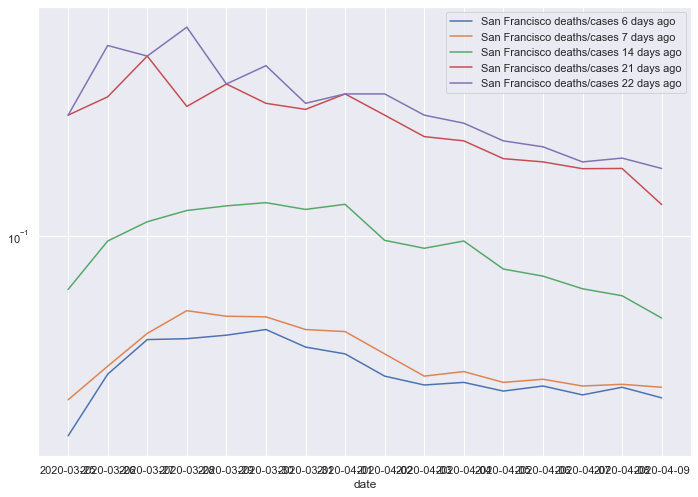


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 38.58 * exp(0.2055 * day)
fitted daily growth rate: 22.82 %, fitted days to doubling: 3.37
actual daily growth rate: 7.86 %, actual days to doubling: 8.82


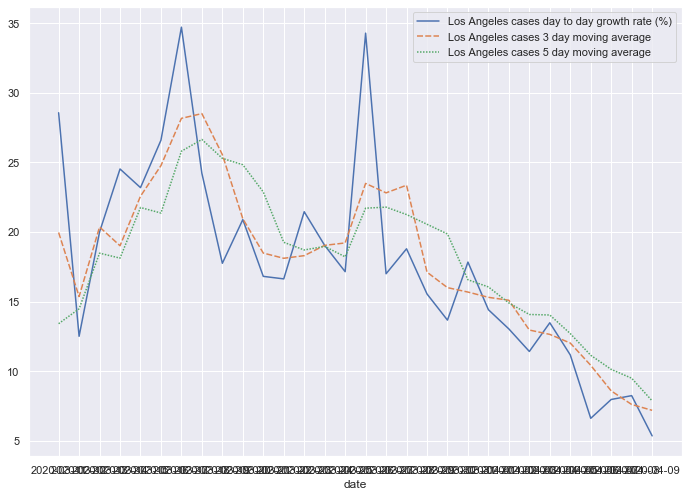

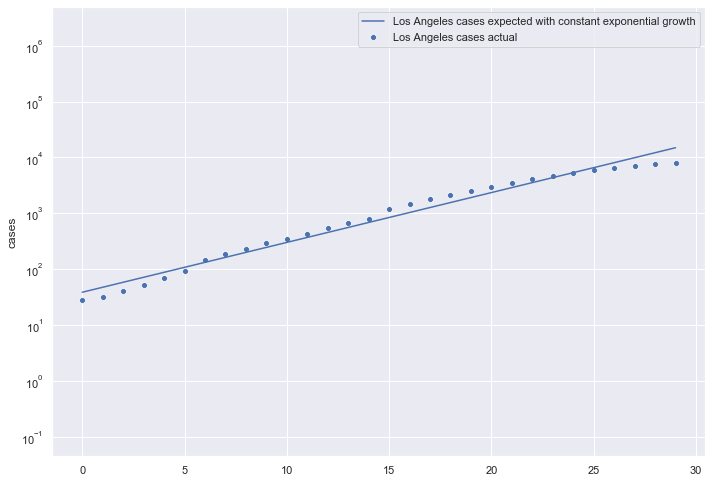

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 0.49 * exp(0.2237 * day)
fitted daily growth rate: 25.06 %, fitted days to doubling: 3.1
actual daily growth rate: 12.09 %, actual days to doubling: 5.73


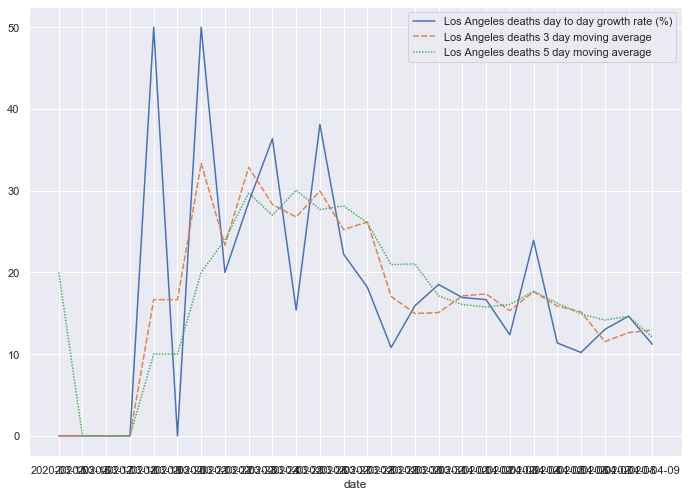

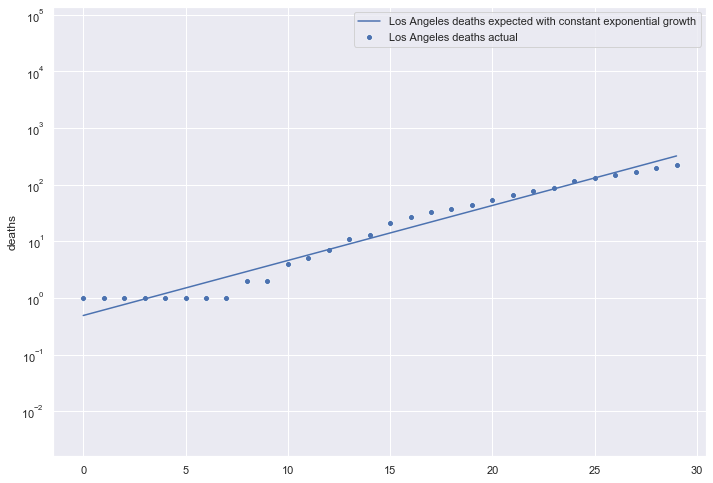

Trajectory plots for Los Angeles, to see when the curve starts flattening


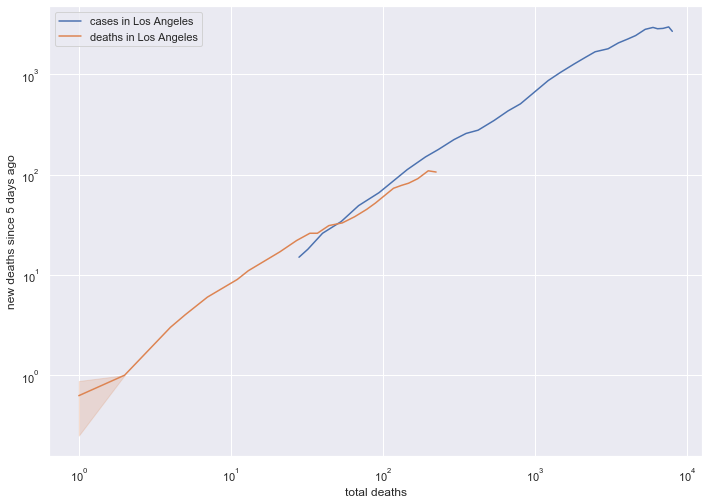

Correlations for Los Angeles:


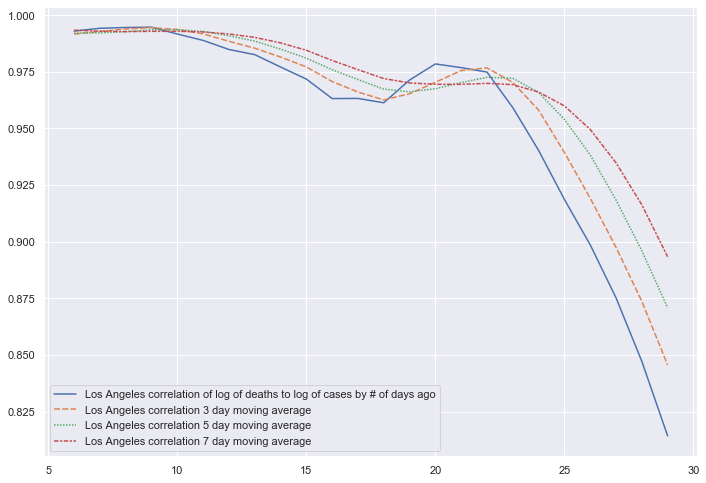

Deaths vs Lagged Values For Los Angeles:


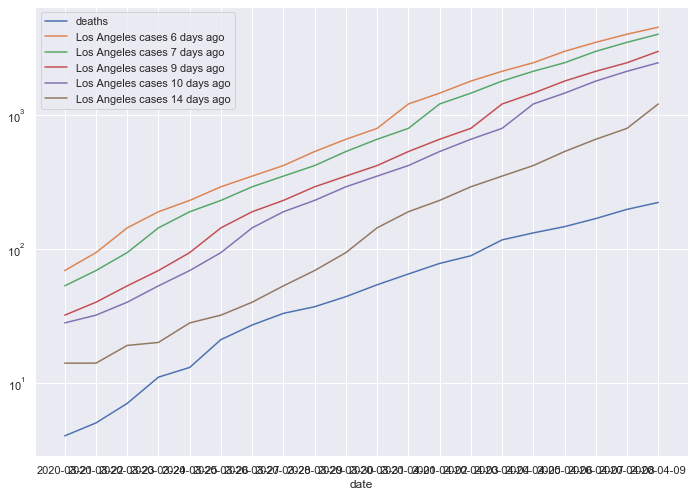

Deaths / Lagged Values For Los Angeles:


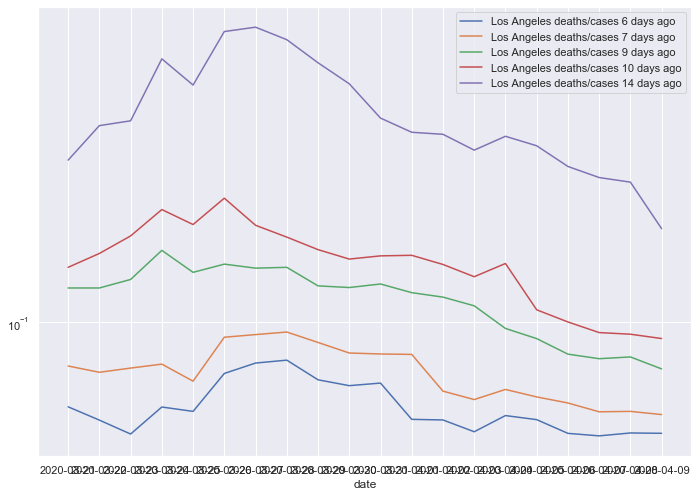


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 27 points:
cases = 6.04 * exp(0.1607 * day)
fitted daily growth rate: 17.43 %, fitted days to doubling: 4.31
actual daily growth rate: 5.97 %, actual days to doubling: 11.61


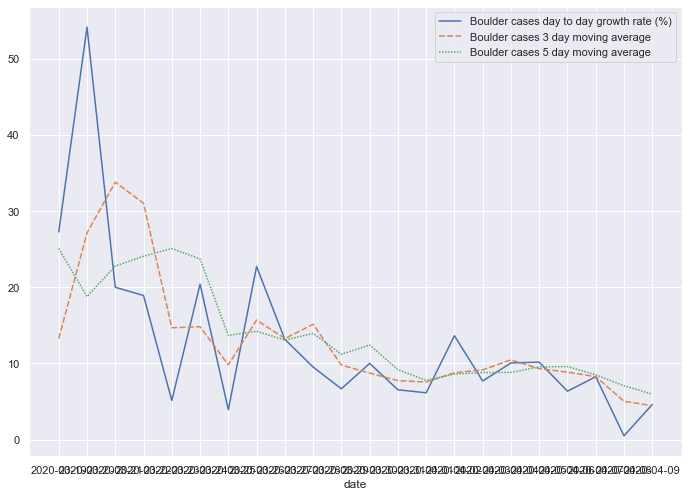

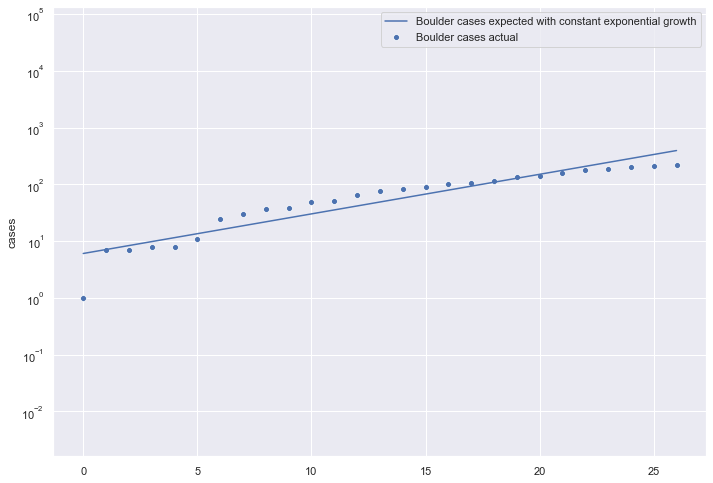

Boulder deaths exponential formula fitted with 14 points:
deaths = 0.9 * exp(0.1279 * day)
fitted daily growth rate: 13.65 %, fitted days to doubling: 5.42
actual daily growth rate: 11.43 %, actual days to doubling: 6.07


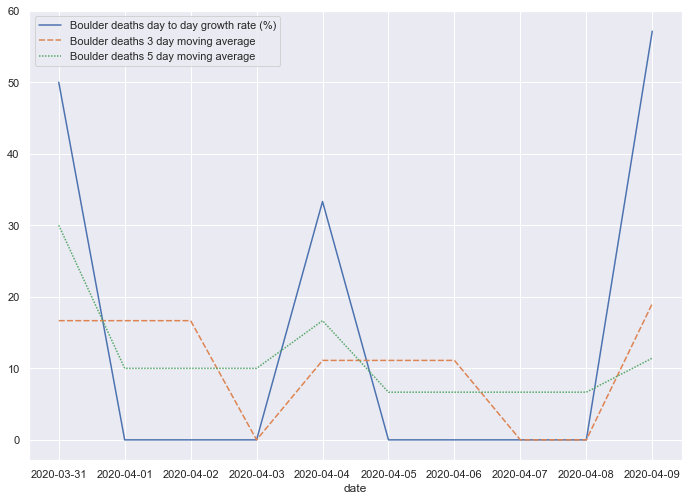

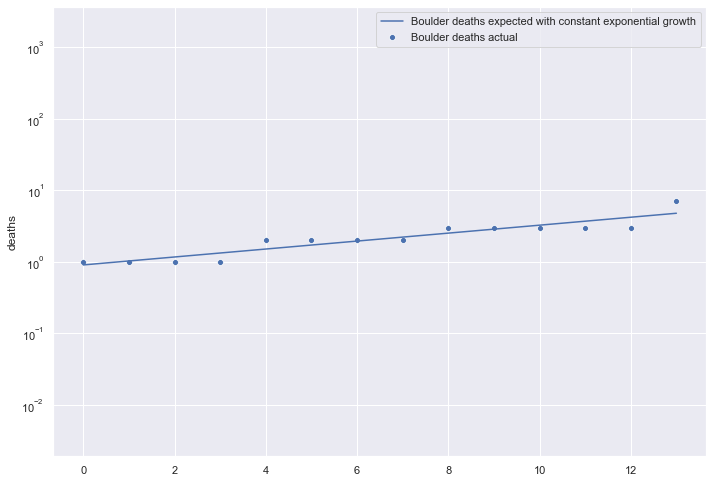

Trajectory plots for Boulder, to see when the curve starts flattening


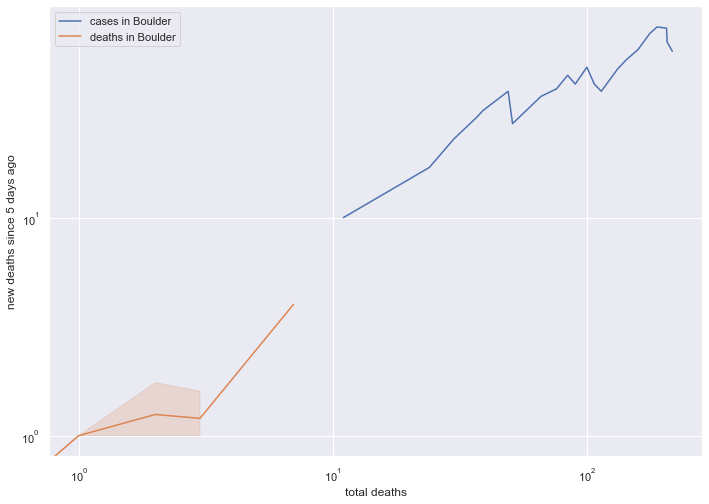

Correlations for Boulder:


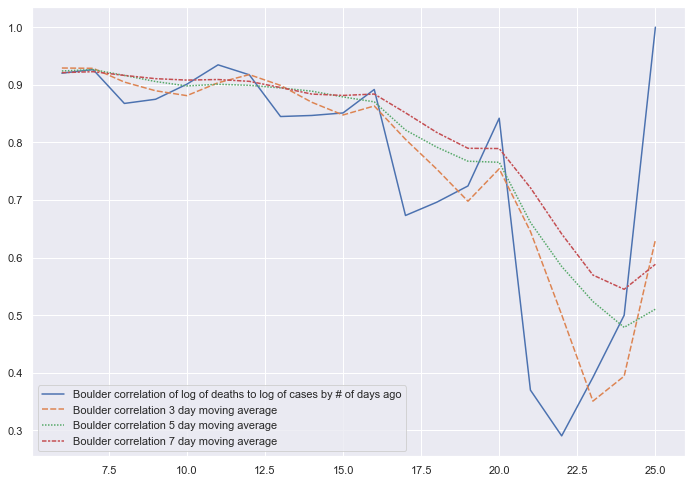

Deaths vs Lagged Values For Boulder:


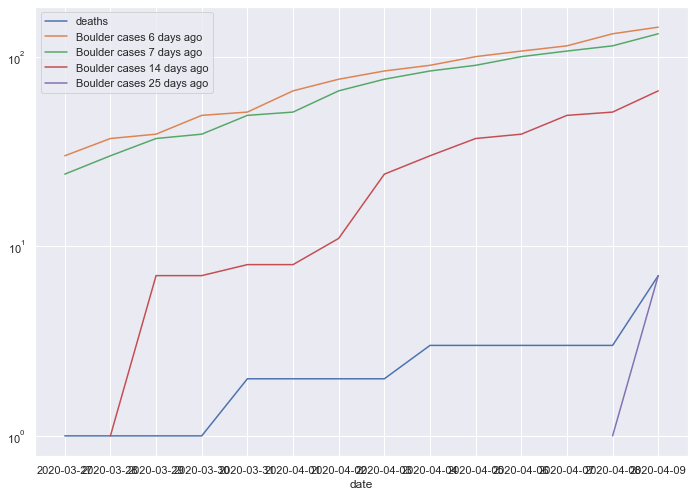

Deaths / Lagged Values For Boulder:


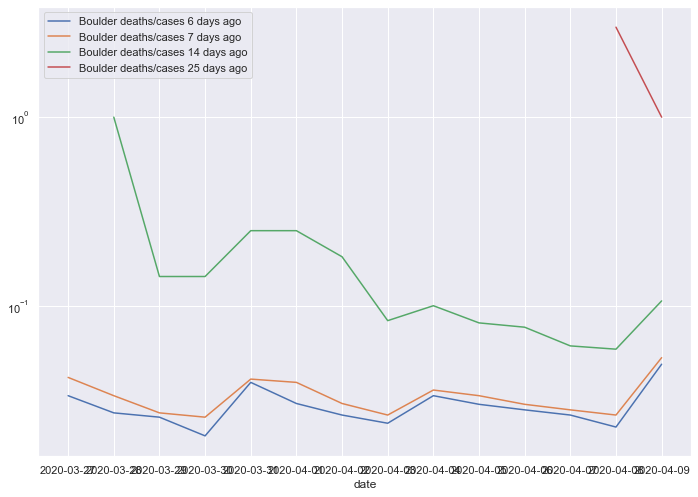


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 14.37 * exp(0.1686 * day)
fitted daily growth rate: 18.37 %, fitted days to doubling: 4.11
actual daily growth rate: 5.66 %, actual days to doubling: 12.25


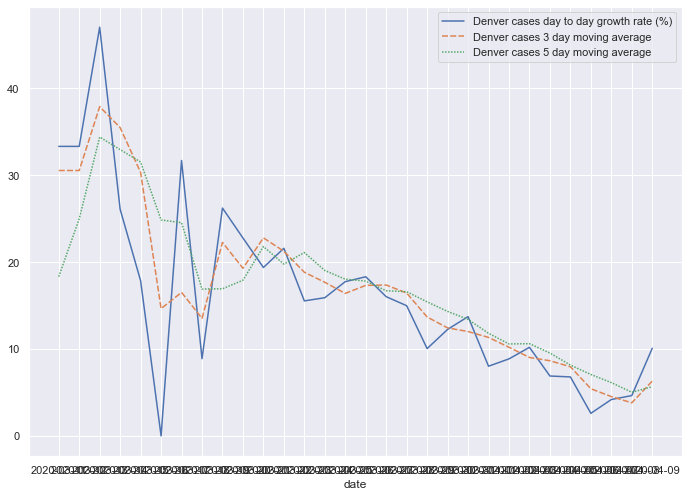

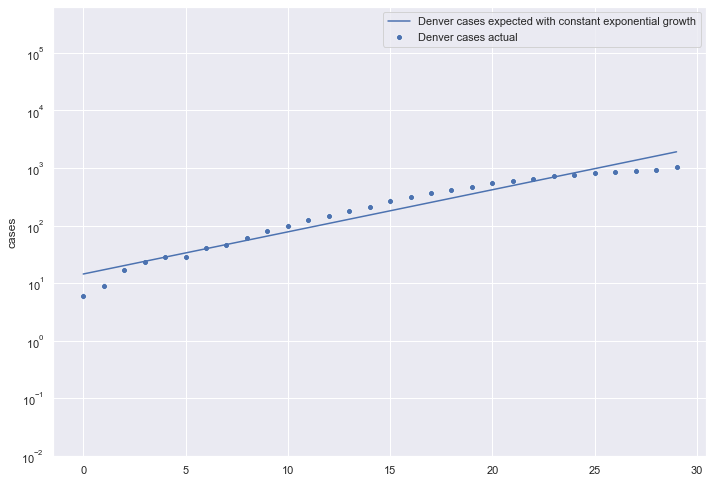

Denver deaths exponential formula fitted with 16 points:
deaths = 2.55 * exp(0.1759 * day)
fitted daily growth rate: 19.23 %, fitted days to doubling: 3.94
actual daily growth rate: 15.33 %, actual days to doubling: 4.52


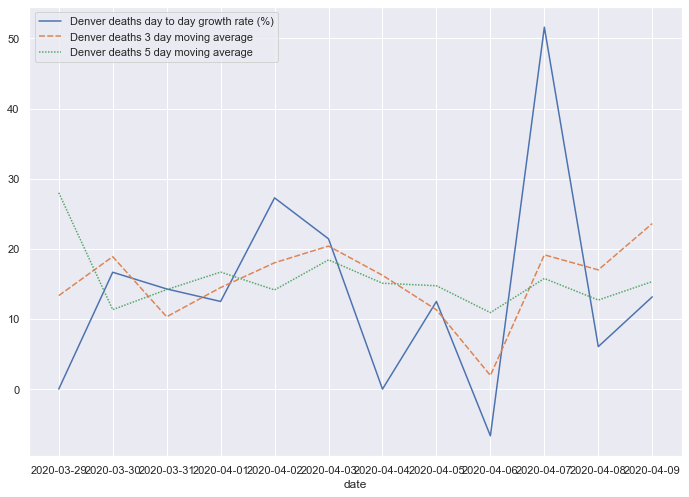

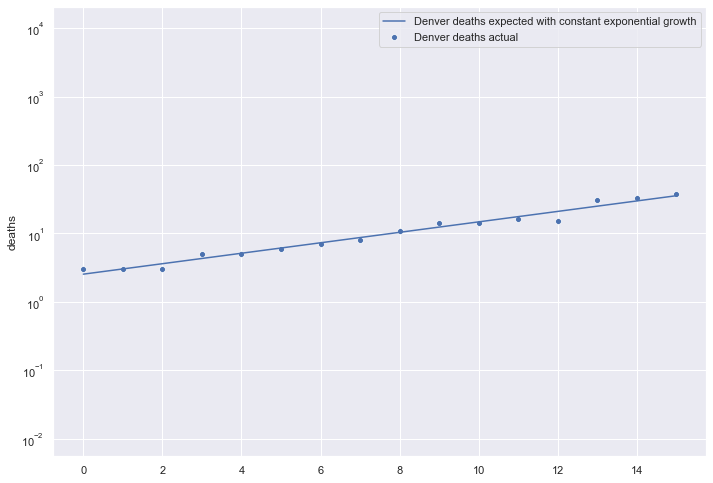

Trajectory plots for Denver, to see when the curve starts flattening


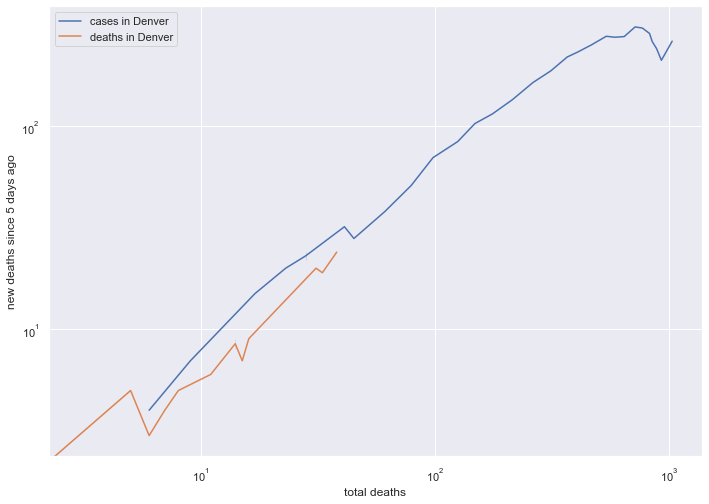

Correlations for Denver:


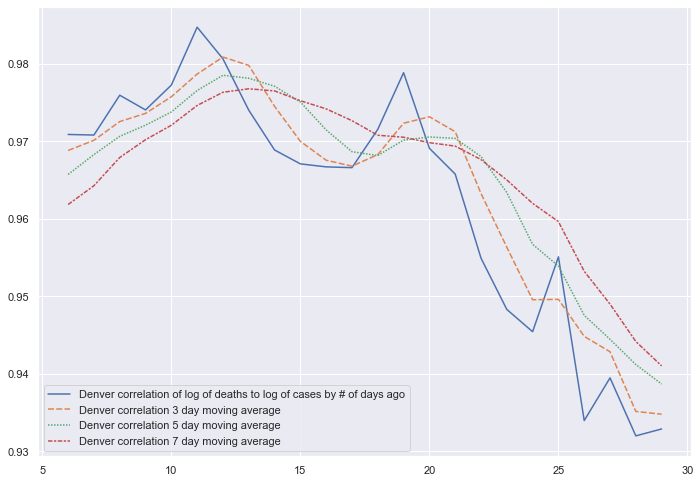

Deaths vs Lagged Values For Denver:


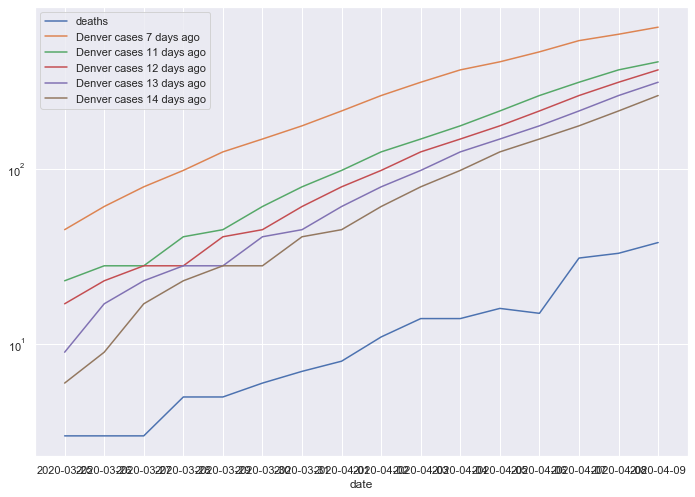

Deaths / Lagged Values For Denver:


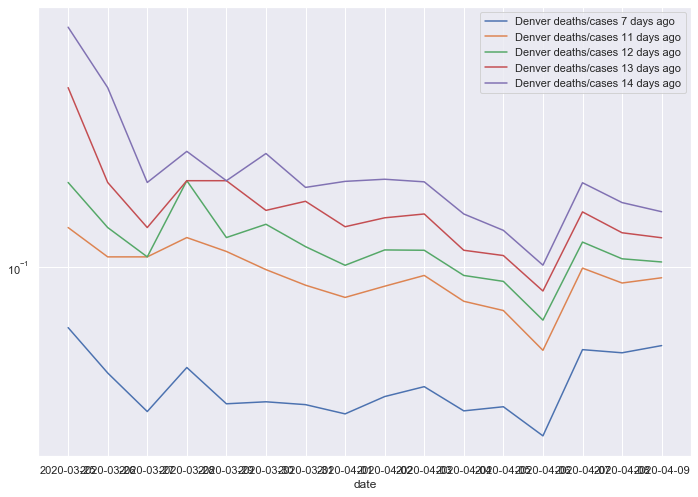


### Analysis for New York City ###

New York City cases exponential formula fitted with 30 points:
cases = 222.53 * exp(0.2473 * day)
fitted daily growth rate: 28.06 %, fitted days to doubling: 2.8
actual daily growth rate: 6.13 %, actual days to doubling: 11.32


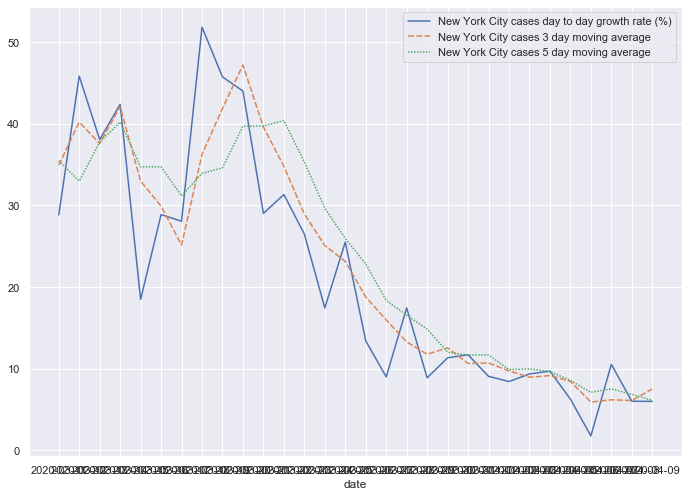

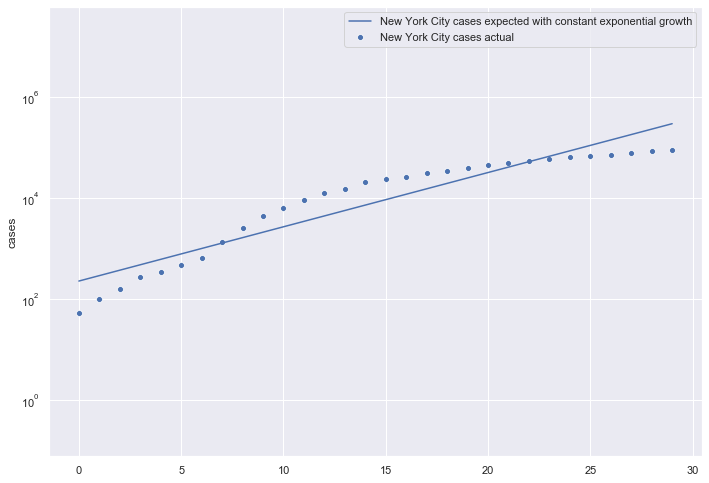

New York City deaths exponential formula fitted with 27 points:
deaths = 5.94 * exp(0.291 * day)
fitted daily growth rate: 33.77 %, fitted days to doubling: 2.38
actual daily growth rate: 14.9 %, actual days to doubling: 4.65


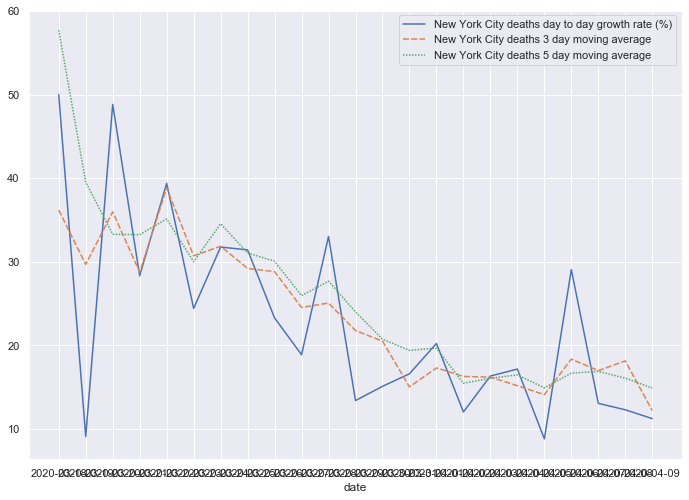

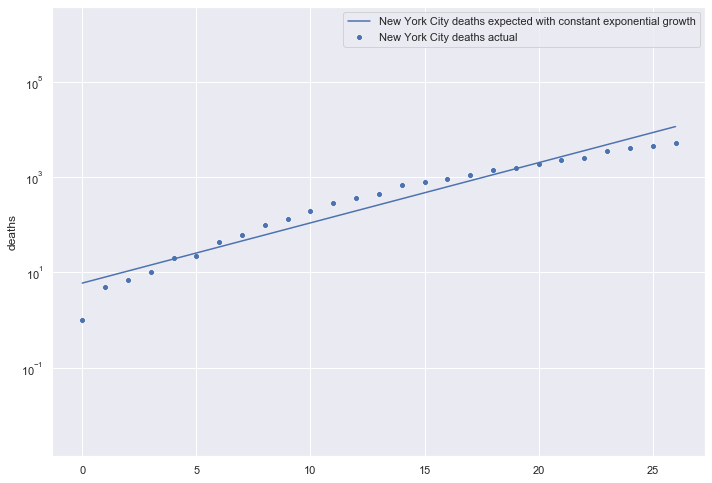

Trajectory plots for New York City, to see when the curve starts flattening


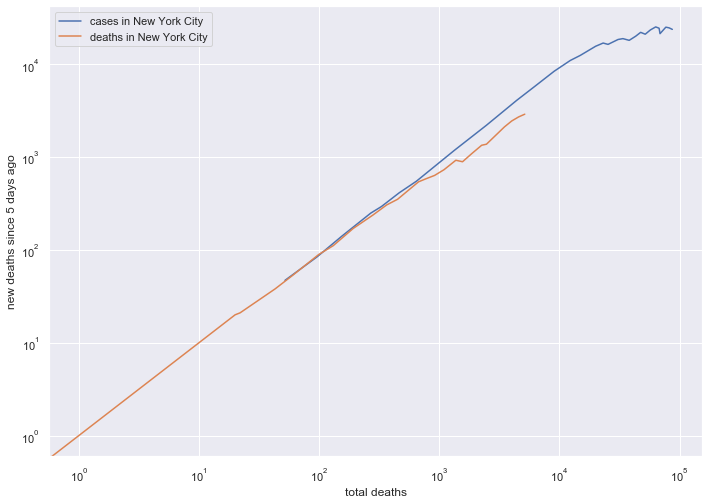

Correlations for New York City:


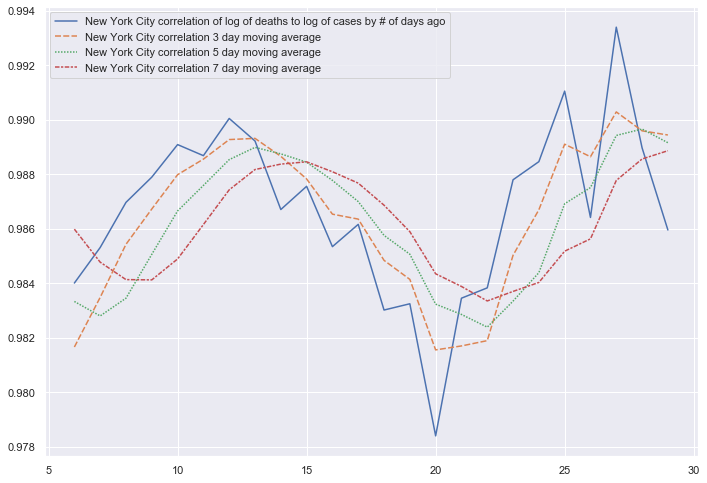

Deaths vs Lagged Values For New York City:


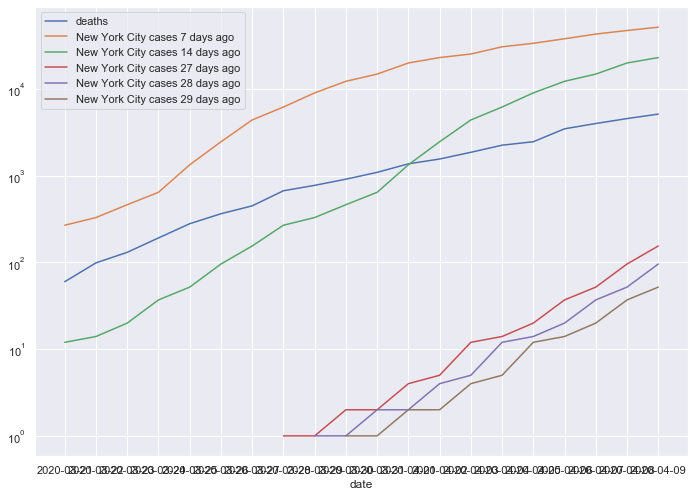

Deaths / Lagged Values For New York City:


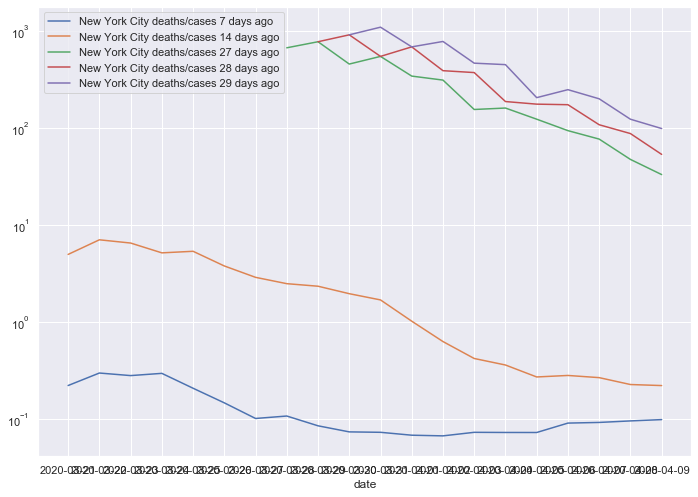


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 275.29 * exp(0.1635 * day)
fitted daily growth rate: 17.76 %, fitted days to doubling: 4.24
actual daily growth rate: 7.33 %, actual days to doubling: 9.46


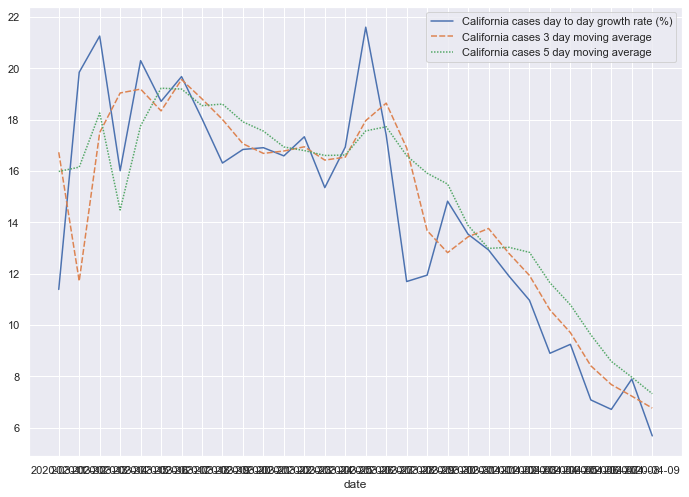

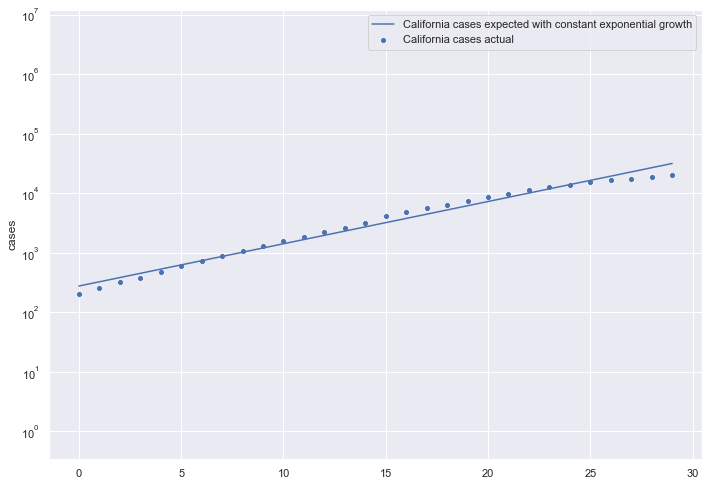

California deaths exponential formula fitted with 30 points:
deaths = 4.27 * exp(0.1807 * day)
fitted daily growth rate: 19.81 %, fitted days to doubling: 3.84
actual daily growth rate: 10.0 %, actual days to doubling: 6.93


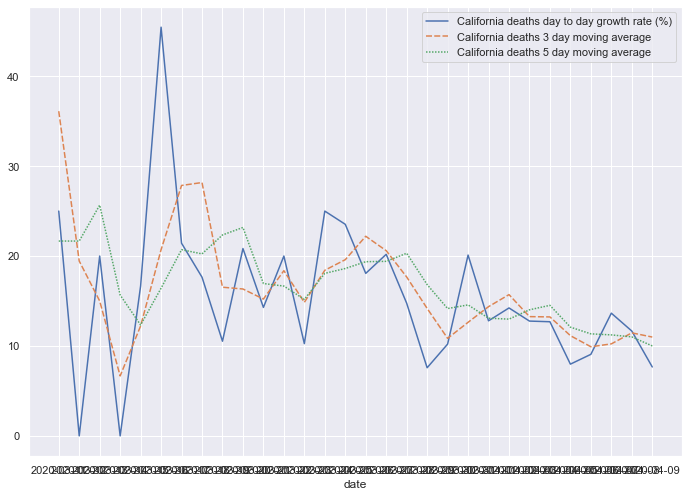

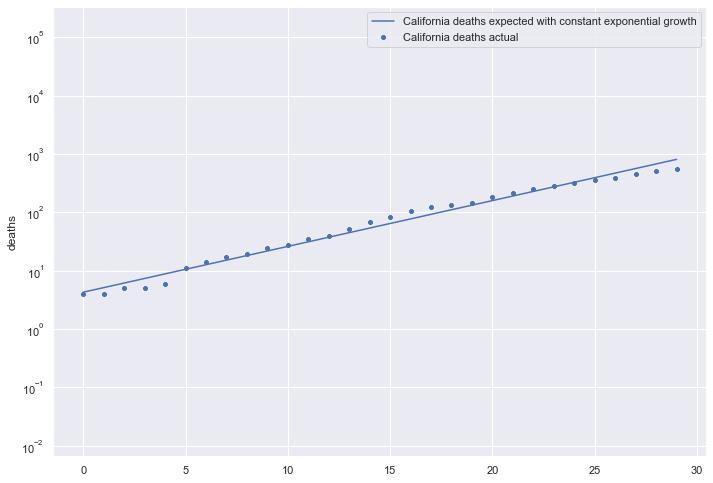

Trajectory plots for California, to see when the curve starts flattening


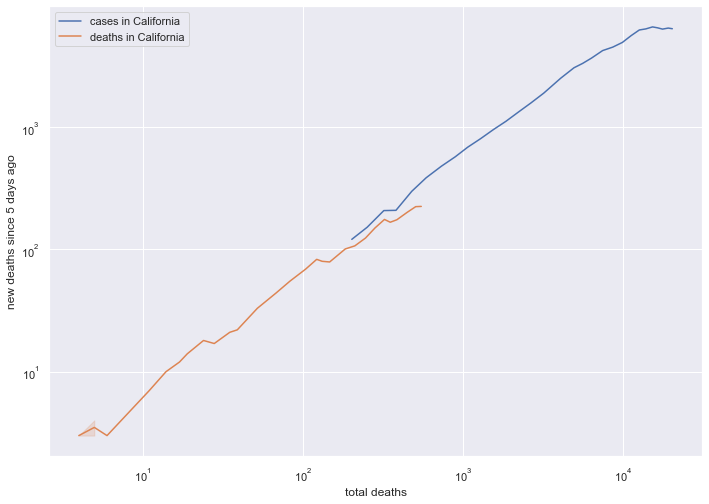

Correlations for California:


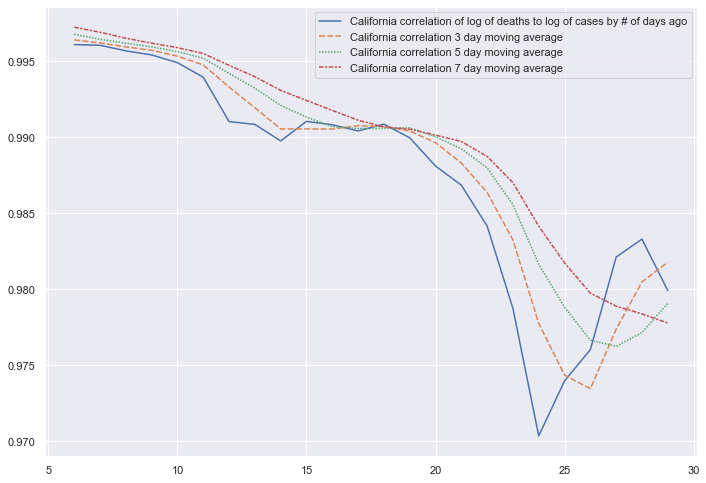

Deaths vs Lagged Values For California:


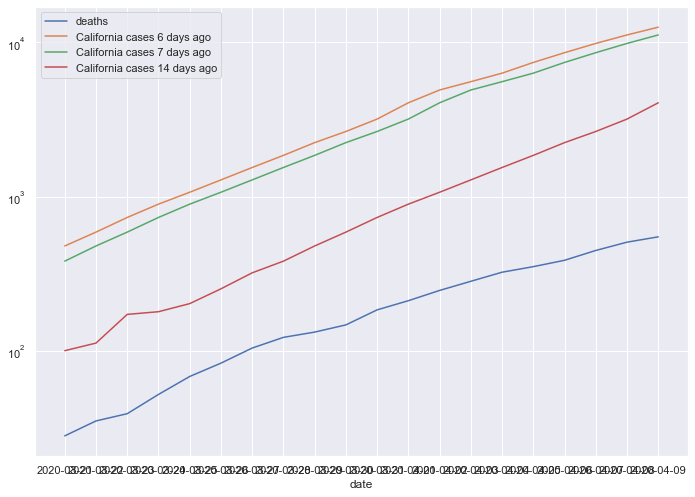

Deaths / Lagged Values For California:


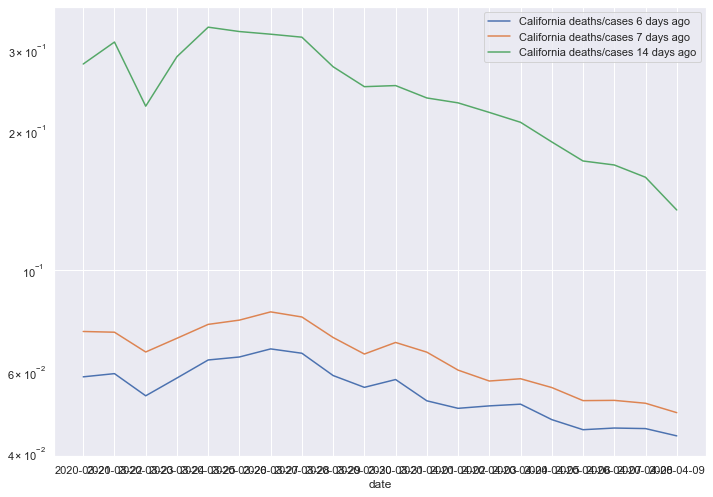


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 67.38 * exp(0.1776 * day)
fitted daily growth rate: 19.44 %, fitted days to doubling: 3.9
actual daily growth rate: 5.89 %, actual days to doubling: 11.78


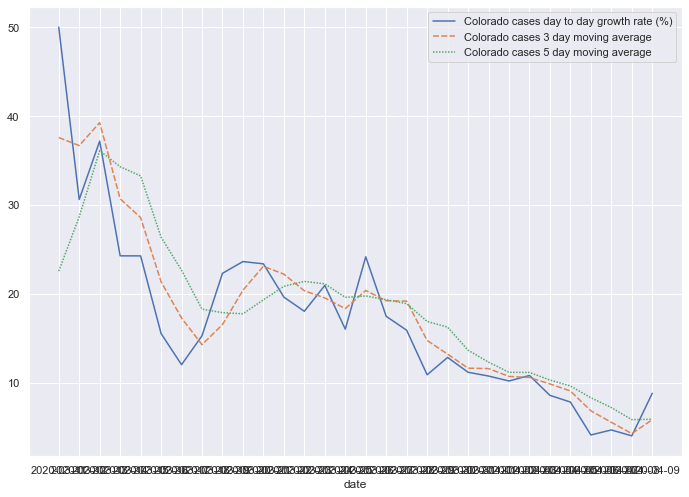

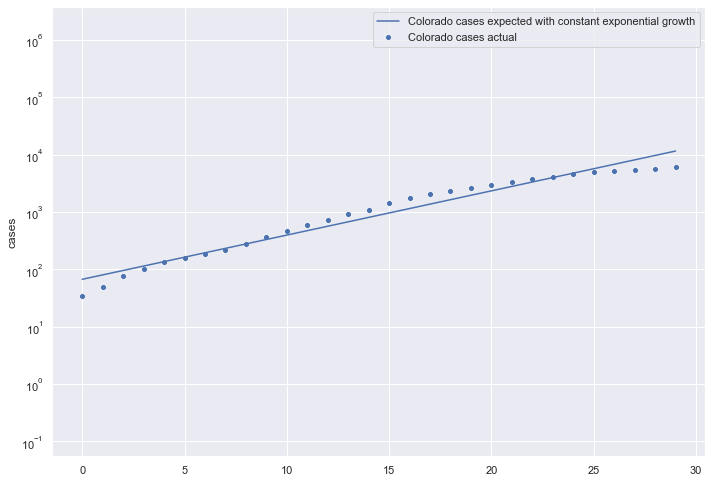

Colorado deaths exponential formula fitted with 29 points:
deaths = 1.19 * exp(0.2002 * day)
fitted daily growth rate: 22.17 %, fitted days to doubling: 3.46
actual daily growth rate: 11.01 %, actual days to doubling: 6.29


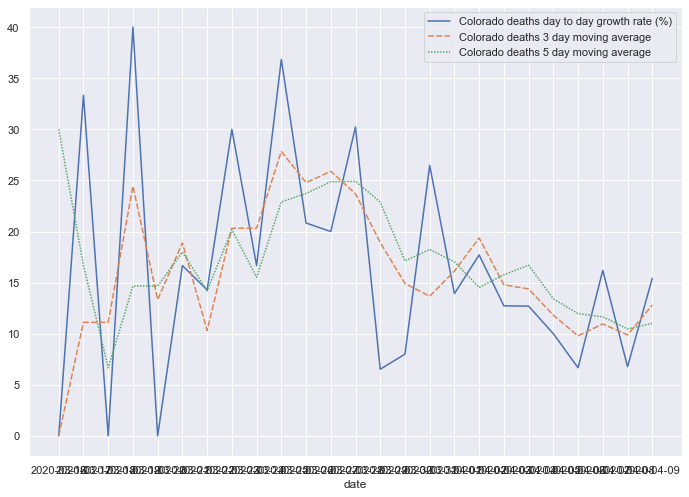

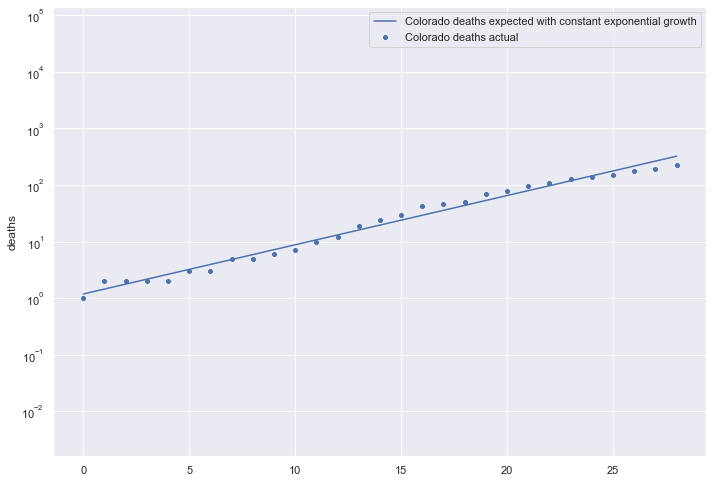

Trajectory plots for Colorado, to see when the curve starts flattening


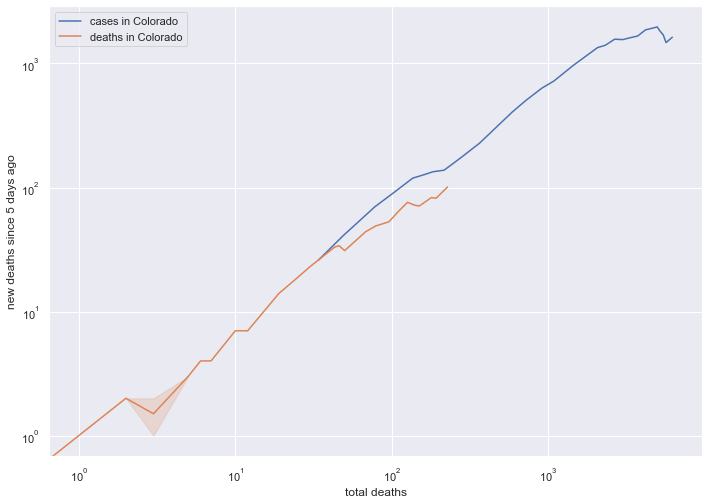

Correlations for Colorado:


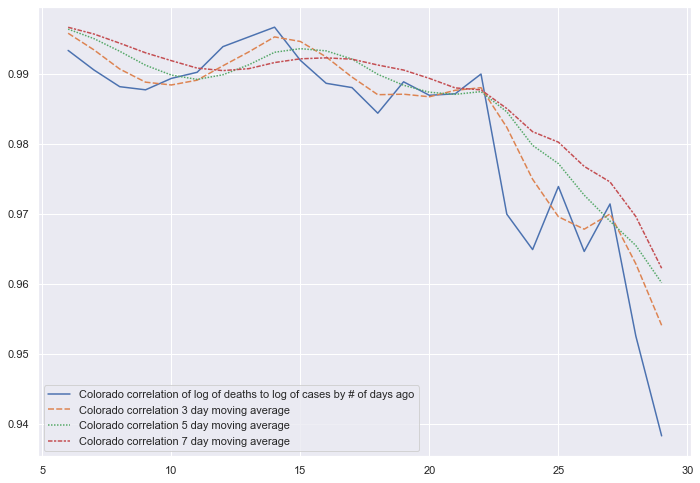

Deaths vs Lagged Values For Colorado:


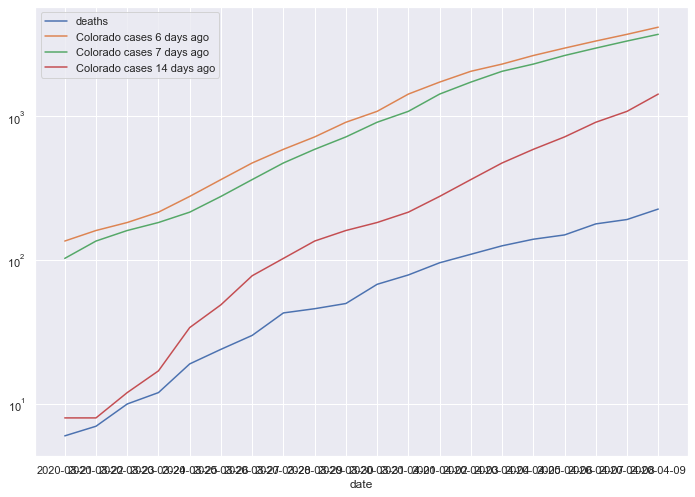

Deaths / Lagged Values For Colorado:


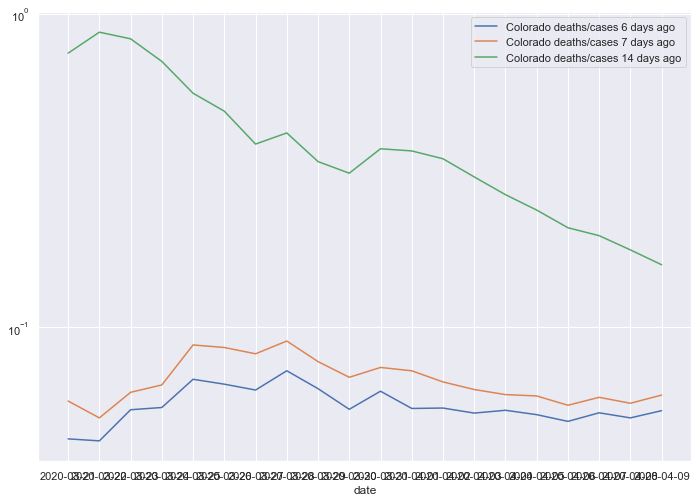


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 8.62 * exp(0.2316 * day)
fitted daily growth rate: 26.06 %, fitted days to doubling: 2.99
actual daily growth rate: 7.69 %, actual days to doubling: 9.01


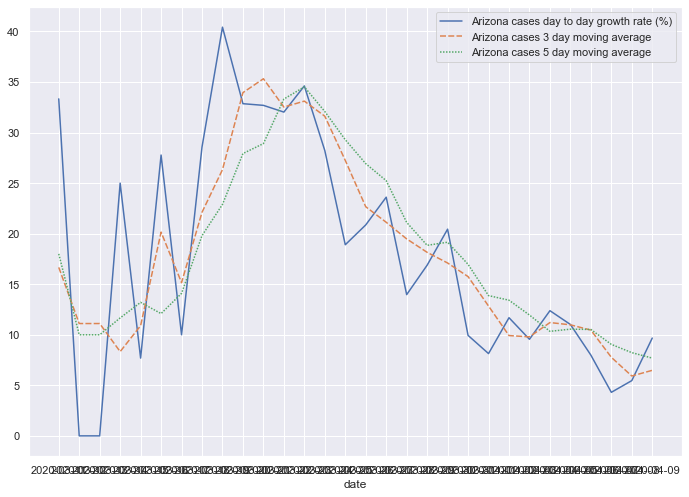

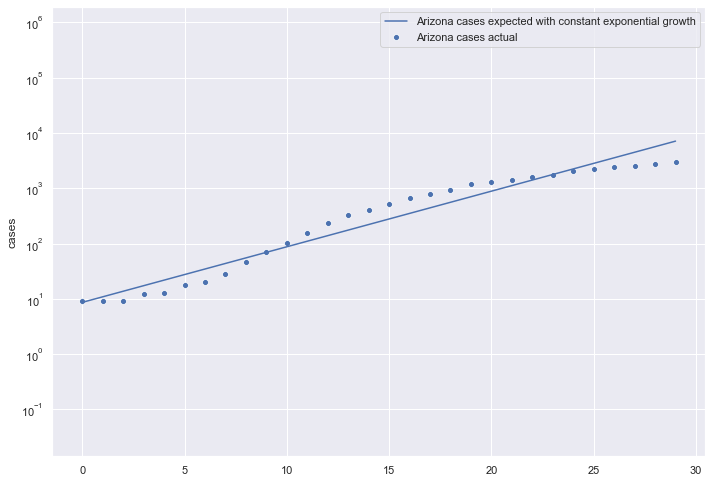

Arizona deaths exponential formula fitted with 21 points:
deaths = 1.22 * exp(0.2377 * day)
fitted daily growth rate: 26.83 %, fitted days to doubling: 2.92
actual daily growth rate: 9.68 %, actual days to doubling: 7.16


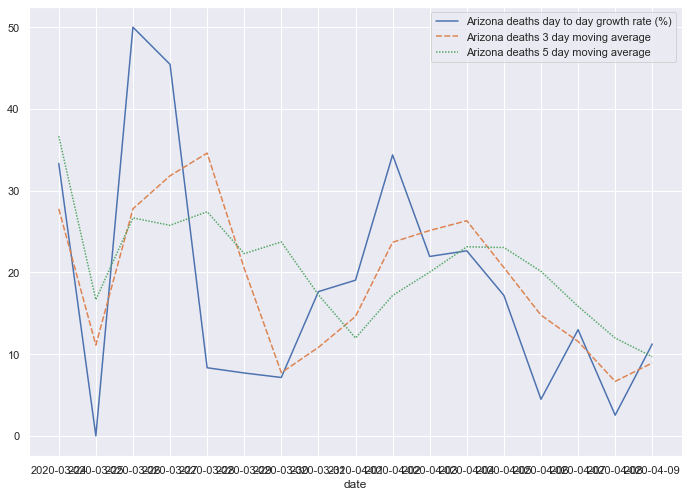

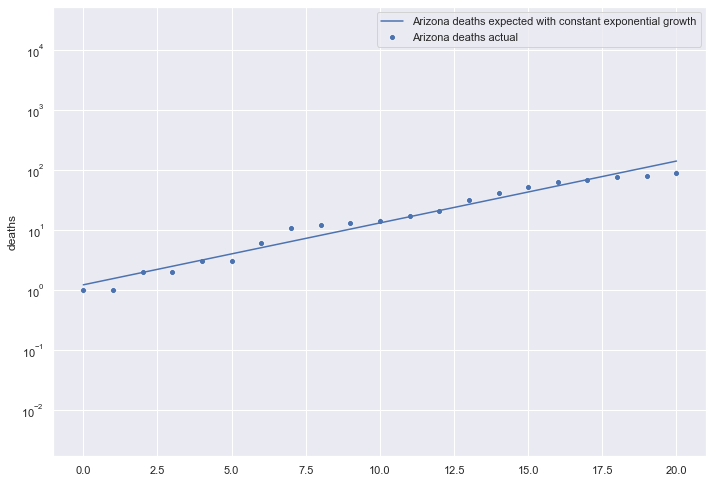

Trajectory plots for Arizona, to see when the curve starts flattening


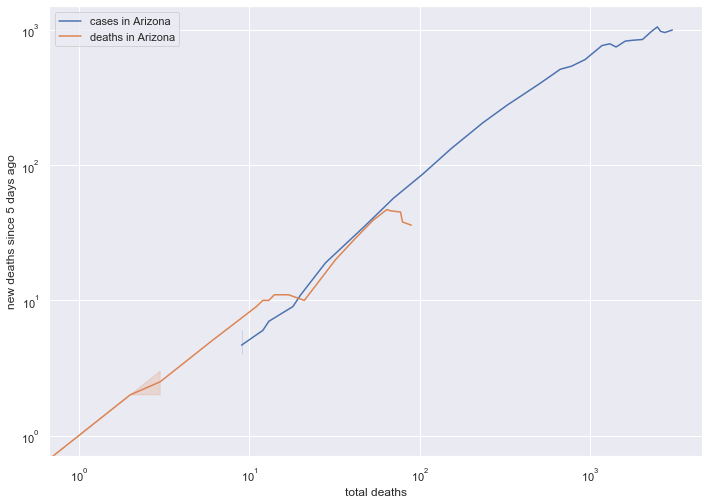

Correlations for Arizona:


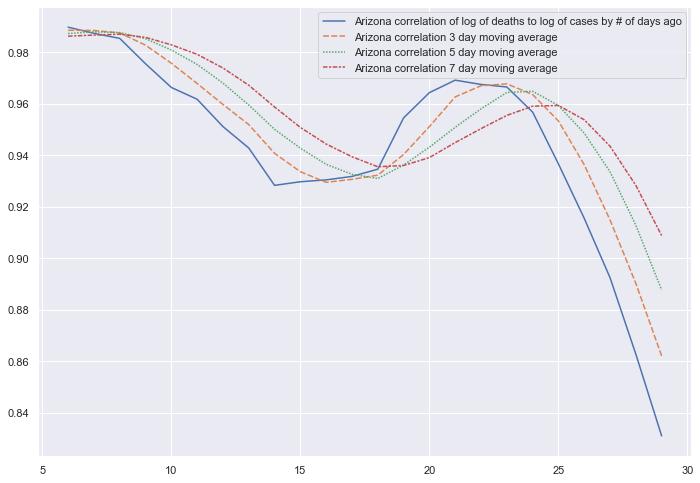

Deaths vs Lagged Values For Arizona:


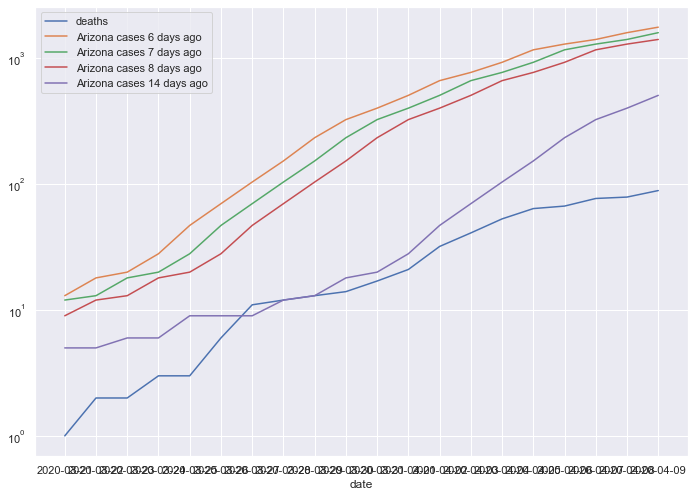

Deaths / Lagged Values For Arizona:


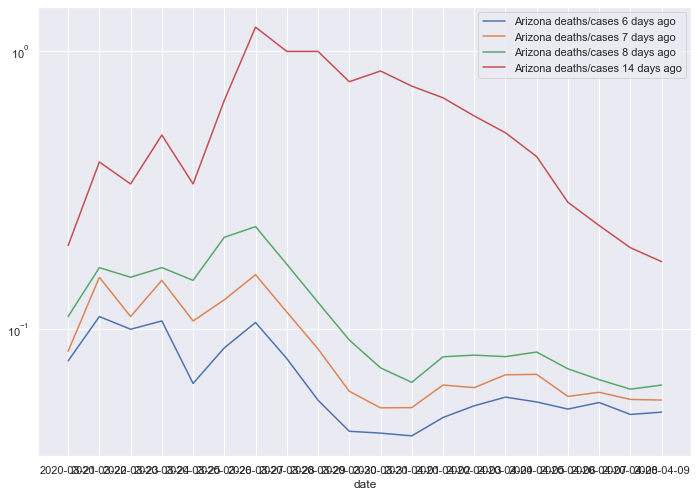


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 2128.3 * exp(0.2117 * day)
fitted daily growth rate: 23.57 %, fitted days to doubling: 3.27
actual daily growth rate: 7.69 %, actual days to doubling: 9.02


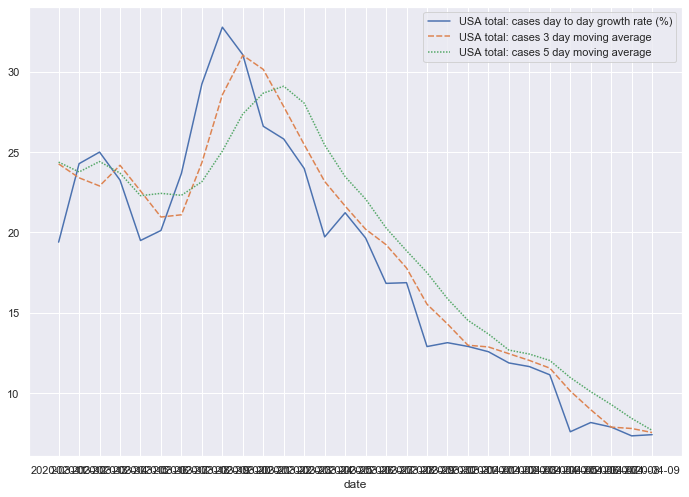

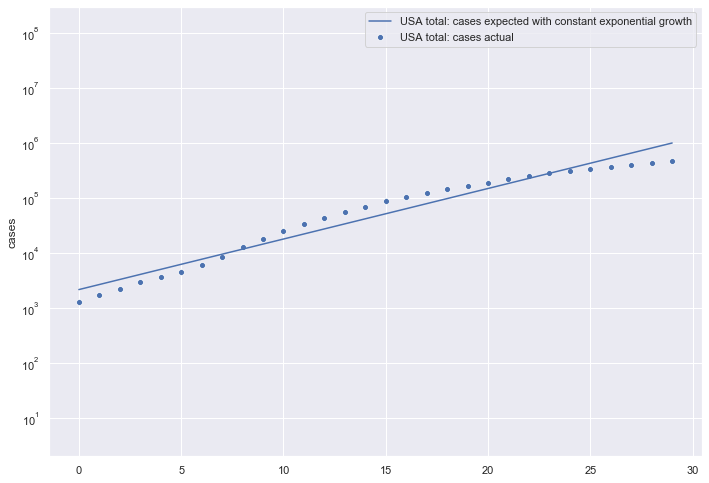

USA total: deaths exponential formula fitted with 30 points:
deaths = 34.76 * exp(0.2266 * day)
fitted daily growth rate: 25.44 %, fitted days to doubling: 3.06
actual daily growth rate: 12.57 %, actual days to doubling: 5.52


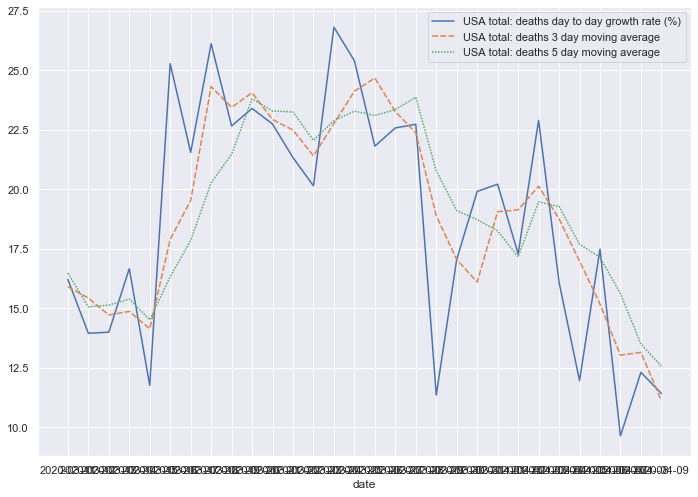

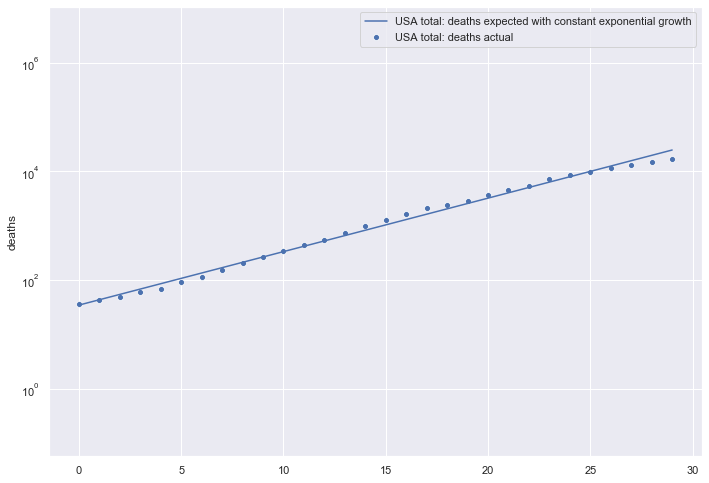

Trajectory plots for USA total:, to see when the curve starts flattening


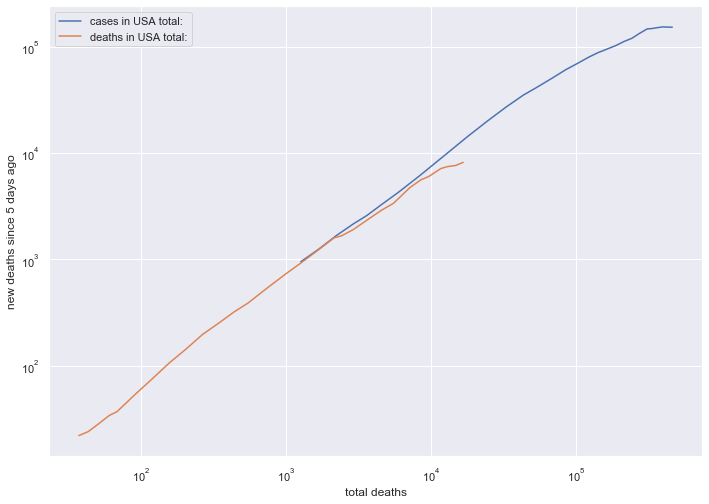

Correlations for USA total::


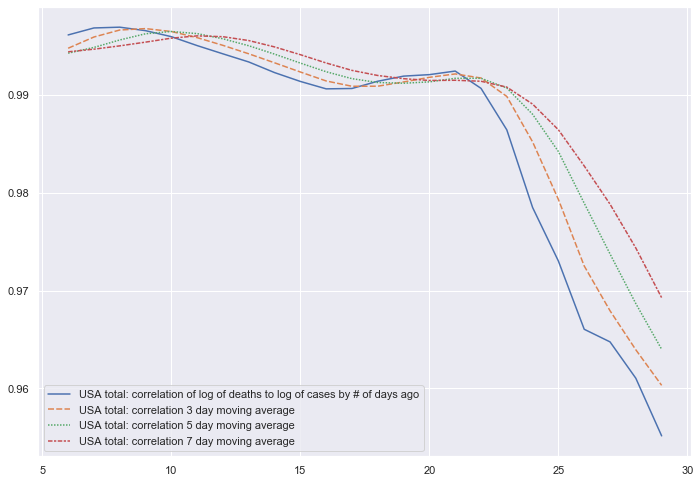

Deaths vs Lagged Values For USA total::


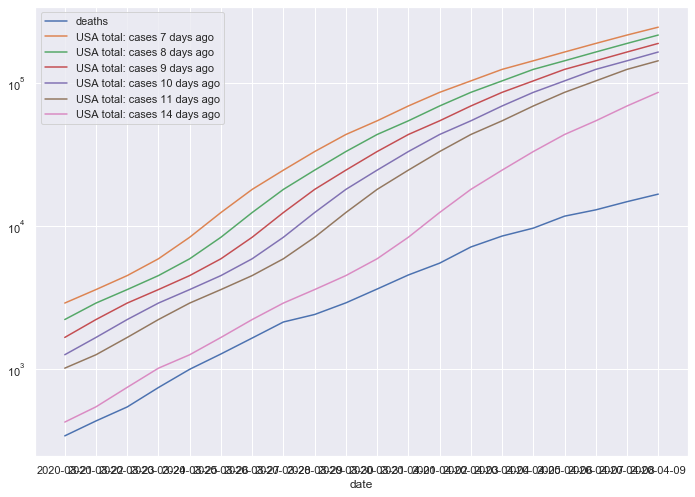

Deaths / Lagged Values For USA total::


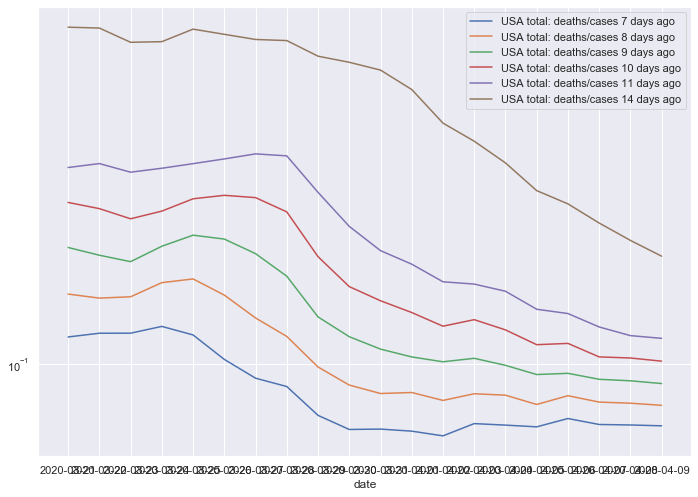

In [21]:
counties =["San Francisco", "Los Angeles", "Boulder", "Denver", "New York City"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)